<a href="https://colab.research.google.com/github/MaartenCVonk/Causal-Modeling/blob/main/Linear_Gaussian_Bayesian_Networks_Discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [2]:
! pip install lgnpy

In [6]:
from lgnpy import LinearGaussian
import pandas as pd
import numpy as np
np.random.seed(42)

## **Initiating Network**

In [8]:
lg = LinearGaussian()
lg.set_edges_from([('A', 'D'), ('B', 'D'), ('D', 'E'), ('C', 'E')])

In [13]:
np.random.seed(40)
n=100
data = pd.DataFrame(columns=['A','B','C','D','E'])
data['A'] = np.random.normal(5,2,n)
data['B'] = np.random.normal(10,2,n)
data['D'] = 2*data['A'] + 3*data['B'] + np.random.normal(0,2,n)
data['C'] = np.random.normal(-5,2,n)
data['E'] = 3*data['C'] + 3*data['D'] + np.random.normal(0,2,n)

lg.set_data(data)

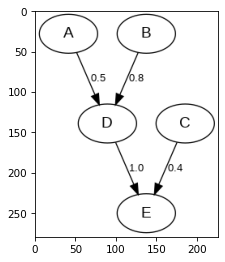

In [24]:
lg.draw_network("my_network", correlation_annotation=False,open=True) #Only first drawn, because all are same

## **Inference**

In Linear Gaussian Distribution the conditional distributions are difined as: 
\begin{align*}
P(Y\mid X) \sim \mathcal{N}(\beta_0+\beta^TX;\sigma^2)
\end{align*}
where the paremeters can be calculated are calculated by parent nodes:
\begin{align*}
\beta_0=\mu_Y-\Sigma_{XY}\Sigma_{XX}^{-1}\mu_X \\
\beta=\Sigma_{XX}^{-1}\Sigma_{YX} \\
\sigma^2= \Sigma_{YY}-\Sigma_{YX}\Sigma_{XX}^{-1}\Sigma_{XY}.
\end{align*}



Given Bayesian Network Factorization:
\begin{align*}
P(a,b,c,d) = P(a)P(b)P(d \mid a, b)P(c)P(e \mid c,d)
\end{align*}
general inference can be executed by marginalizing out the variables. For example:
\begin{align*}
P(e)&=\int_{a}\int_{b}\int_{c} \int_{d}   P(a,b,c,d,e) \\ &=\int_{a}\int_{b}\int_{c} \int_{d}  P(a)P(b)P(d \mid a, b)P(c)P(e \mid c,d)
\end{align*}

In [21]:
lg.run_inference(debug=False)

/usr/local/lib/python3.7/dist-packages/lgnpy/LinearGaussian.py:106: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  .replace(pd.np.nan, "", regex=True)


,Evidence,Mean,Mean_inferred,Variance,Variance_inferred,u_%change
A,,4.9544,,3.822,,
B,,9.9212,,4.102,,
C,,-4.9243,,3.284,,
D,,39.5681,39.5681,54.168,4.6767,
E,,104.1639,104.1639,570.746,2.5672,


When there is evidence we can propogate this evidence according to:
\begin{align*}
P(e \mid do(a))=P(e \mid a) &= \int_{b}\int_{c} \int_{d}   P(b,c,d,e\mid a) \\ &=\int_{b}\int_{c} \int_{d}  P(b)P(d \mid a, b)P(c)P(e \mid c,d)
\end{align*}

and expected value
\begin{align*}
\mathbb{E}(e \mid do(a))&= e \int_{b}\int_{c} \int_{d}   P(b,c,d,e\mid a) \\ &=\int_{b}\int_{c} \int_{d} e P(b)P(d \mid a, b)P(c)P(e \mid c,d)
\end{align*}



In [23]:
lg.set_evidences({'A':50})
lg.run_inference(debug=False)

/usr/local/lib/python3.7/dist-packages/lgnpy/LinearGaussian.py:106: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  .replace(pd.np.nan, "", regex=True)


,Evidence,Mean,Mean_inferred,Variance,Variance_inferred,u_%change
A,50.0,4.9544,50.0,3.822,,909.1998
B,,9.9212,,4.102,,
C,,-4.9243,,3.284,,
D,,39.5681,130.545,54.168,4.6767,229.9248
E,,104.1639,377.7628,570.746,2.5672,262.6618


Because the distributions are continuous: $\mathbb{E}(e \mid do(a))\rightarrow ∞$ as $a \rightarrow ∞$

### **Discretization**